# **Task 4: Data Visualization/Analysis**

## **Importing Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor

## **Loading the Dataset Downloaded From ThingSpeak**

In [ ]:
df = pd.read_csv('feed.csv')

In [ ]:
df.sample(5)

,created_at,entry_id,field1,field2,field3,field4,field5
16,2023-12-18 13:18:20 UTC,17,-17.8,80.0,1,0,0
28,2023-12-18 13:28:30 UTC,29,62.9,23.5,0,0,0
11,2023-12-18 13:16:35 UTC,12,-17.8,80.0,1,0,0
1,2023-12-18 13:08:33 UTC,2,-35.3,56.0,0,0,0
4,2023-12-18 13:09:31 UTC,5,-35.3,56.0,0,0,0


## **Preprocessing the Dataset**

In [ ]:
# Dropping the irrelevant columns
df = df.drop("entry_id", axis='columns')

In [ ]:
# Renaming the columns
df.columns = ['timestamp', 'temperature', 'humidity', 'theft-alert', 'led', 'fire-alarm']

## **Generating Additional Data**

In [ ]:
# Function to generate random data
def generate_random_data(num_rows):

    # Generating timestamps in reverse order with a frequency of 15 seconds
    earliest_timestamp = df['timestamp'].min()
    timestamps = pd.date_range(end=earliest_timestamp, freq='15S', periods=num_rows)[::-1]

    # Generating random temperature and humidity values with inverse relation
    temperature = np.random.uniform(-40, 80, num_rows)
    humidity = np.random.uniform(0, 100, num_rows) * (1 - temperature/80)
    humidity = np.clip(humidity, 0, 100)

    # Generating random theft-alert and LED with higher probability during night time
    night_time = (timestamps.hour >= 20) | (timestamps.hour < 6)
    theft_alert = np.random.randint(0, 2, num_rows) * night_time
    led = np.random.randint(0, 2, num_rows) * night_time

    # Generating random fire-alarm with higher probability during cooking time
    cooking_time = (timestamps.hour >= 13) & (timestamps.hour <= 16)
    fire_alarm = np.random.randint(0, 2, num_rows) * cooking_time

    random_data = pd.DataFrame({
        'timestamp': timestamps,
        'temperature': temperature,
        'humidity': humidity,
        'theft-alert': theft_alert,
        'led': led,
        'fire-alarm': fire_alarm
    })

    return random_data

In [ ]:
num_rows = 6000

In [ ]:
random_data = generate_random_data(num_rows)

In [ ]:
# Adding randomly generated dataframe with dataframe from ThingSpeak
df_updated = pd.concat([df, random_data], ignore_index=True)

In [ ]:
# Converting the 'timestamp' column to datetime format
df_updated['timestamp'] = pd.to_datetime(df_updated['timestamp'])

In [ ]:
df_updated.sample(10)

,timestamp,temperature,humidity,theft-alert,led,fire-alarm
2719,2023-12-18 01:55:59+00:00,58.902282,5.423188,0,1,0
5666,2023-12-17 13:39:14+00:00,-24.193613,100.000000,0,0,1
4588,2023-12-17 18:08:44+00:00,37.742306,1.796558,0,0,0
3703,2023-12-17 21:49:59+00:00,39.536824,2.125567,1,0,0
2754,2023-12-18 01:47:14+00:00,19.894406,70.425232,0,0,0
4225,2023-12-17 19:39:29+00:00,-27.002896,100.000000,0,0,0
4195,2023-12-17 19:46:59+00:00,24.494246,63.955205,0,0,0
1345,2023-12-18 07:39:29+00:00,-2.339834,67.534014,0,0,0
4338,2023-12-17 19:11:14+00:00,-38.014838,97.206582,0,0,0
3255,2023-12-17 23:41:59+00:00,54.396239,25.487439,1,1,0


In [ ]:
# Storing the dataframe in csv file
df_updated.to_csv('updated_feeds.csv', index=False)

## **Data Visualization And Analysis**



### **1. Descriptive Analysis:**

In [ ]:
# Displaying dataset information including data types and memory usage
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6030 entries, 0 to 6029
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   timestamp    6030 non-null   datetime64[ns, UTC]
 1   temperature  6030 non-null   float64            
 2   humidity     6030 non-null   float64            
 3   theft-alert  6030 non-null   int64              
 4   led          6030 non-null   int64              
 5   fire-alarm   6030 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(2), int64(3)
memory usage: 282.8 KB


In [ ]:
# Summary statistics of the dataset
df_updated.describe()

,temperature,humidity,theft-alert,led,fire-alarm
count,6030.000000,6030.000000,6030.000000,6030.000000,6030.000000
mean,19.367821,37.045046,0.204975,0.193201,0.080929
std,34.401950,31.034254,0.403717,0.394842,0.272748
min,-39.984198,0.000706,0.000000,0.000000,0.000000
25%,-10.731347,9.950442,0.000000,0.000000,0.000000
50%,19.208922,28.475041,0.000000,0.000000,0.000000
75%,48.860041,58.988179,0.000000,0.000000,0.000000
max,80.000000,100.000000,1.000000,1.000000,1.000000


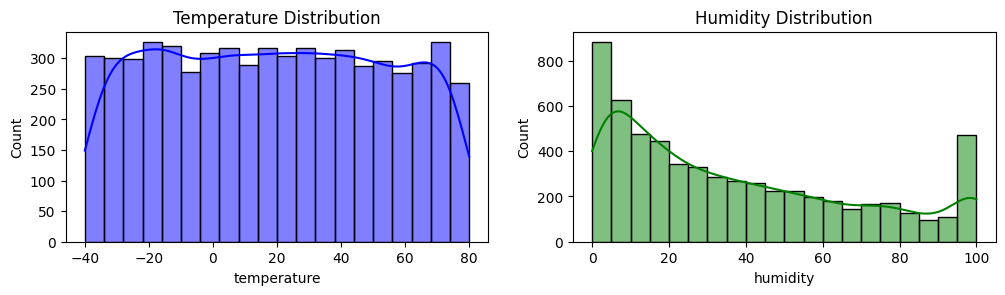

In [ ]:
# Plotting temperature and humidity distributions
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df_updated['temperature'], bins=20, kde=True, color='blue')
plt.title('Temperature Distribution');

plt.subplot(2, 2, 2)
sns.histplot(df_updated['humidity'], bins=20, kde=True, color='green')
plt.title('Humidity Distribution');

In [ ]:
# Creating line plot to visualize temperature and humidity trends over time
fig_trend = px.line(df_updated, x='timestamp', y=['temperature', 'humidity'],
                    labels={'value': 'Value', 'variable': 'Metric'},
                    title='Temperature and Humidity Trend Over Time',
                    template='plotly_dark', color_discrete_map={'temperature': 'cyan', 'humidity': 'lightpink'})

fig_trend.update_layout(xaxis=dict(rangeslider=dict(visible=True), type='date'))

fig_trend.show()

In [ ]:
# Filtering the dataset for records with 'led', 'theft-alert', or 'fire-alarm' equal to 1
df_filtered = df_updated[(df_updated['led'] == 1) | (df_updated['theft-alert'] == 1) | (df_updated['fire-alarm'] == 1)]

# Reshaping the filtered dataset into a melted format and keeping only rows with value 1
df_melted = df_filtered.melt(id_vars=['timestamp'], value_vars=['led', 'theft-alert', 'fire-alarm'],
                             var_name='variable', value_name='value')
df_melted = df_melted[df_melted['value'] == 1]

# Grouping by variable and calculating count
df_counts = df_melted.groupby('variable').agg(count=('value', 'count')).reset_index()

# Using bar chart to visualize counts
fig = px.bar(df_counts, x='variable', y='count',
             labels={'variable': 'Variable', 'count': 'Count'},
             title='Count of 1s for LED, Theft Alert, and Fire Alarm',
             template='plotly_dark')

fig.show()

### **2. Diagnostic Analyis**

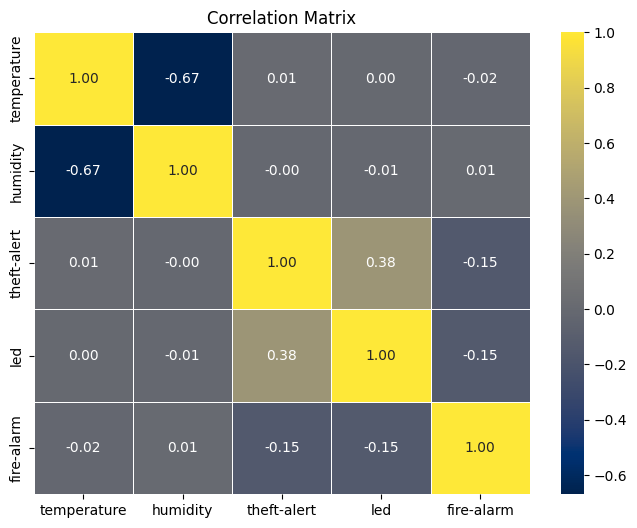

In [ ]:
# Creating heatmap to visualize the correlation relationships between variables
correlation_matrix = df_updated.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='cividis', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Using the heatmap we can observe a strong inverse correlation of `-0.67` between temperature and humidity.


In [ ]:
# Creating a scatter plot to analyze the relationship between temperature and humidity
fig_scatter = px.scatter(df_updated, x='temperature', y='humidity',
                         color='temperature',
                         labels={'temperature': 'Temperature', 'humidity': 'Humidity'},
                         title='Diagnostic Analysis: Temperature vs Humidity',
                         template='plotly_dark',
                         color_continuous_scale='Viridis')

fig_scatter.show()

The scatter plot displays a downward slope, suggesting a negative relationship between the two variables. As temperature increases, humidity tends to decrease and vice versa.


In [ ]:
# Grouping dataframe by timestamp at a 1-hour frequency and aggregate event counts
df_grouped = df_updated.groupby(pd.Grouper(key='timestamp', freq='1H')).agg({
    'led': 'sum',
    'fire-alarm': 'sum',
    'theft-alert': 'sum'
}).reset_index()

# Extracting hour from the timestamp
df_grouped['hour'] = df_grouped['timestamp'].dt.hour

# Grouping by hour and sum the event counts
df_grouped_sum = df_grouped.groupby('hour').agg({
    'led': 'sum',
    'fire-alarm': 'sum',
    'theft-alert': 'sum'
}).reset_index()

# Creating a line to visualize hourly event counts
fig_line = px.line(df_grouped_sum, x='hour', y=['led', 'fire-alarm', 'theft-alert'],
                   labels={'value': 'Event Count'}, title='Event Count Over Time', template='plotly_dark')

fig_line.update_layout(xaxis=dict(tickmode='linear', tick0=0, dtick=1))
fig_line.show()

We can observe an increase in incidents of thefts and LED usage during nighttime (7 PM - 6 AM), implying a potential correlation with low light conditions. The fire alarm rate shows a notable increase during daytime hours (12 PM - 5 PM), possibly indicating increased fire usage during this period.

## 3. Predictive Analysis

In [ ]:
# Forecasting function
def forecast(df, target_var):
    # Using Random Forest Regressor and training the model
    model = RandomForestRegressor()
    model.fit(df[['hour', 'minute', 'second']], df[target_var])

    # Generating timestamps for the next two hours
    future_timestamps = pd.date_range(df['timestamp'].max(), df['timestamp'].max() + timedelta(hours=2), freq='15S')[1:]

    # Creating a dataframe for forecasting
    future_df = pd.DataFrame({'timestamp': future_timestamps})
    future_df['hour'] = future_df['timestamp'].dt.hour
    future_df['minute'] = future_df['timestamp'].dt.minute
    future_df['second'] = future_df['timestamp'].dt.second

    # Forecasting the values
    future_df[target_var] = model.predict(future_df[['hour', 'minute', 'second']])

    return future_df

In [ ]:
df_updated = df_updated.sort_values(by='timestamp')

In [ ]:
# Creating features for the model
df_updated['hour'] = df_updated['timestamp'].dt.hour
df_updated['minute'] = df_updated['timestamp'].dt.minute
df_updated['second'] = df_updated['timestamp'].dt.second

In [ ]:
# Forecasting temperature for the next two hours
forecast_temp = forecast(df_updated, 'temperature')

In [ ]:
# Plotting forecasted temperature data along with historical data
fig_temp = px.line(df_updated, x='timestamp', y='temperature', labels={'temperature': 'Historical Temperature'})
fig_temp.add_scatter(x=forecast_temp['timestamp'], y=forecast_temp['temperature'], mode='lines', name='Forecasted Temperature')

slider_range = [df_updated['timestamp'].min(), df_updated['timestamp'].max()]
fig_temp.update_layout(title_text='Temperature Forecast',
                       xaxis_title='Timestamp',
                       yaxis_title='Temperature',
                       template='plotly_dark',
                       xaxis_rangeslider_visible=True,
                       xaxis_range=slider_range)

fig_temp.show()

In [ ]:
# Forecasting humidity for the next two hours
forecast_humid = forecast(df_updated, 'humidity')

In [ ]:
# Plotting forecasted humidity data along with historical data
fig_humid = px.line(df_updated, x='timestamp', y='humidity', labels={'humidity': 'Historical Humidity'})
fig_humid.add_scatter(x=forecast_humid['timestamp'], y=forecast_humid['humidity'], mode='lines', name='Forecasted Humidity')

fig_humid.update_layout(title_text='Humidity Forecast',
                        xaxis_title='Timestamp',
                        yaxis_title='Humidity',
                        template='plotly_dark',
                        xaxis_rangeslider_visible=True,
                        xaxis_range=slider_range)

fig_humid.show()